In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd

file_path = 'A20000021_Ahmed_Dataset.csv'

dataset = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
dataset.columns = ['Product_Details', 'Rating', 'Ratings_Count', 'Stock_Status']

dataset['Rating'] = dataset['Rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dataset['Ratings_Count'] = dataset['Ratings_Count'].str.extract(r'(\d+)').astype(float)

cleaned_data = dataset.dropna(subset=['Product_Details', 'Rating']).reset_index(drop=True)

In [7]:
cleaned_data

Product_Details  Rating  Ratings_Count  \
0   Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches...     3.5           63.0   
1   Xiaomi Redmi Note 12 Dual SIM Smartphone with ...     4.1        25316.0   
2   Amazon Essentials Men's Digital Chronograph Bl...     4.3          743.0   
3   LUENX Aviator Sunglasses for Men Square Polari...     4.5         4587.0   
4   SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI S...     4.5          226.0   
5   Google Pixel 8 Pro 5G | Unlocked Dual SIM (nan...     4.3          429.0   
6   dreame X40 Ultra Robotic Vacuum with Removable...     4.2          134.0   
7   Shark Pet Cordless Stick Vacuum with XL Dust C...     4.3        12417.0   
8   HANPOSH Mens Digital Watch Ultra-Thin Minimali...     3.9          298.0   
9   ETAMOON Wireless Gaming Controller compatible ...     3.2           24.0   
10  HANPOSH Mens Digital Watch Ultra-Thin Minimali...     3.9          298.0   
11  HANPOSH Mens Digital Watch Ultra-Thin Minimali...     3.9          298.0   
12  Xbox Core Wireless Gaming Controller  Carbon ...     4.6        77302.0   
13  Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches...     3.5           63.0   
14  Xiaomi Redmi Note 12 Dual SIM Smartphone with ...     4.1        25316.0   
15  Google Pixel 8 Pro 5G | Unlocked Dual SIM (nan...     4.3          429.0   
16  LUENX Aviator Sunglasses for Men Square Polari...     4.5         4587.0   

                          Stock_Status  
0                             In Stock  
1                             In Stock  
2                             In Stock  
3                             In Stock  
4   Only 3 left in stock - order soon.  
5   Only 1 left in stock - order soon.  
6                             In Stock  
7                             In Stock  
8                             In Stock  
9                             In Stock  
10                            In Stock  
11                            In Stock  
12       Available to ship in 1-2 days  
13                            In Stock  
14                            In Stock  
15  Only 1 left in stock - order soon.  
16                            In Stock

In [8]:
cleaned_data['Rating'] = cleaned_data['Rating'].clip(1, 5)

Tnu = cleaned_data['Ratings_Count'].sum()

Tni = cleaned_data['Product_Details'].nunique()

ratings_per_product = cleaned_data.groupby('Product_Details')['Rating'].count()

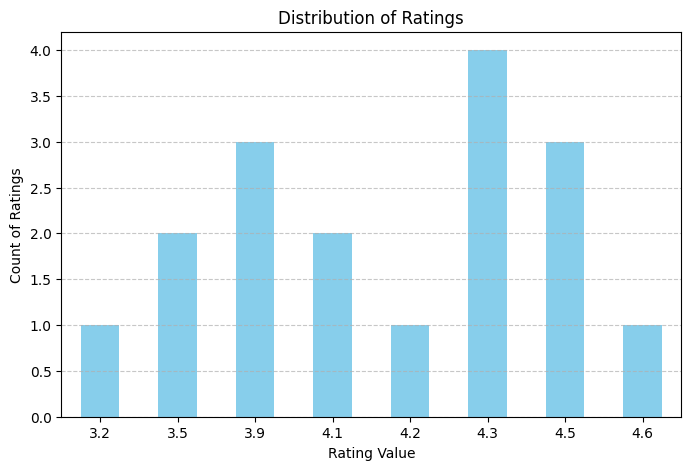

In [9]:
rating_distribution = cleaned_data['Rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
lowest_rated_items

Product_Details
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock    3.2
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty                        3.5
Name: Rating, dtype: float64

In [15]:
Tnu

152530.0

In [16]:
Tni

11

In [17]:
rating_distribution

Rating
3.2    1
3.5    2
3.9    3
4.1    2
4.2    1
4.3    4
4.5    3
4.6    1
Name: count, dtype: int64

In [18]:
average_ratings

Product_Details
Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch                                                                                                                               4.3
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock                                                          3.2
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian)                                                                                               4.3
HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women    3.9
LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessories 61MM Driving Outdoor                                                                                          4.5
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Smartphone Unlocked Android 50MP Zoom Camera Long Battery Life S Pen US Version 2024 Titanium Gray 12G ram                                                           4.5
Shark Pet Cordless Stick Vacuum with XL Dust Cup LED Headlights Removable Handheld Vac Crevice Tool Portable Vacuum for Household Pet Hair Carpet and Hard Floors 40min Runtime Grey IX141                        4.3
Xbox Core Wireless Gaming Controller  Carbon Black  Xbox Series X|S Xbox One Windows PC Android and iOS                                                                                                         4.6
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty                                                                              3.5
Xiaomi Redmi Note 12 Dual SIM Smartphone with 8GB RAM 128GB ROM 4G LTE Connectivity High-Resolution Display Powerful Performance and Sleek Design in Onyx Gray for a Superior Mobile Experience                   4.1
dreame X40 Ultra Robotic Vacuum with Removable & Liftable Mop 12000Pa Suction Side Brush Extensive Cleaning 158? Mop & Washboard Self Cleaning Auto-Empty Auto Refill liftable Brushes                            4.2
Name: Rating, dtype: float64

In [12]:
average_ratings = cleaned_data.groupby('Product_Details')['Rating'].mean()

lowest_rated_items = average_ratings.nsmallest(2)

# PCA-Mean Filling

In [13]:
I1 = lowest_rated_items.index[0]
I2 = lowest_rated_items.index[1]

In [19]:
average_rating_I1 = average_ratings[I1]
average_rating_I2 = average_ratings[I2]

print(f"Average Rating for Item {I1}: {average_rating_I1}")
print(f"Average Rating for Item {I2}: {average_rating_I2}")

Average Rating for Item ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock: 3.2
Average Rating for Item Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty: 3.5


In [20]:
cleaned_data['Rating'] = cleaned_data.groupby('Product_Details')['Rating'].transform(lambda x: x.fillna(x.mean()))

cleaned_data['Rating_diff'] = cleaned_data.apply(
    lambda row: row['Rating'] - average_ratings[row['Product_Details']], axis=1)

ratings_matrix = cleaned_data.pivot_table(index='Ratings_Count', columns='Product_Details', values='Rating')

In [21]:
ratings_matrix_filled = ratings_matrix.fillna(0)

cov_matrix = ratings_matrix_filled.cov()

cov_matrix

Product_Details                                     Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch  \
Product_Details                                                                                                                           
Amazon Essentials Men's Digital Chronograph Bla...                                           1.680909                                     
ETAMOON Wireless Gaming Controller compatible w...                                          -0.125091                                     
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano...                                          -0.168091                                     
HANPOSH Mens Digital Watch Ultra-Thin Minimalis...                                          -0.152455                                     
LUENX Aviator Sunglasses for Men Square Polariz...                                          -0.175909                                     
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Sm...                                          -0.175909                                     
Shark Pet Cordless Stick Vacuum with XL Dust Cu...                                          -0.168091                                     
Xbox Core Wireless Gaming Controller  Carbon B...                                          -0.179818                                     
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches ...                                          -0.136818                                     
Xiaomi Redmi Note 12 Dual SIM Smartphone with 8...                                          -0.160273                                     
dreame X40 Ultra Robotic Vacuum with Removable ...                                          -0.164182                                     

Product_Details                                     ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock  \
Product_Details                                                                                                                                                                                                
Amazon Essentials Men's Digital Chronograph Bla...                                          -0.125091                                                                                                          
ETAMOON Wireless Gaming Controller compatible w...                                           0.930909                                                                                                          
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano...                                          -0.125091                                                                                                          
HANPOSH Mens Digital Watch Ultra-Thin Minimalis...                                          -0.113455                                                                                                          
LUENX Aviator Sunglasses for Men Square Polariz...                                          -0.130909                                                                                                          
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Sm...                                          -0.130909                                                                                                          
Shark Pet Cordless Stick Vacuum with XL Dust Cu...                                          -0.125091                                                                                                          
Xbox Core Wireless Gaming Controller  Carbon B...                                          -0.133818                                                                                                          
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches ...                                          -0.101818           

In [23]:
def get_top_peers(item, top_n=5):
    item_cov = cov_matrix[item].dropna()
    top_peers = item_cov.sort_values(ascending=False).head(top_n).index.tolist()
    return top_peers

top_5_peers_I1 = get_top_peers(I1, top_n=5)
top_10_peers_I1 = get_top_peers(I1, top_n=10)
top_5_peers_I2 = get_top_peers(I2, top_n=5)
top_10_peers_I2 = get_top_peers(I2, top_n=10)

print(f"Top 5 peers for {I1}: {top_5_peers_I1}")
print(f"Top 10 peers for {I1}: {top_10_peers_I1}")
print(f"Top 5 peers for {I2}: {top_5_peers_I2}")
print(f"Top 10 peers for {I2}: {top_10_peers_I2}")

Top 5 peers for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock: ['ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock', 'Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty', 'HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women', 'Xiaomi Redmi Note 12 Dual SIM Smartphone with 8GB RAM 128GB ROM 4G LTE Connectivity High-Resolution Display Powerful Performance and Sleek Design in Onyx Gray for a Superior Mobile Experience', 'dreame X40 Ultra Robotic Vacuum with Removable & Liftable Mop 12000Pa Suction Side Brush Extensive Cleaning 158? Mop & Washboard Se

In [25]:
def predict_rating(item, top_peers):
    peer_ratings = average_ratings[top_peers]
    return peer_ratings.mean()

predicted_rating_I1_top_5 = predict_rating(I1, top_5_peers_I1)
predicted_rating_I2_top_5 = predict_rating(I2, top_5_peers_I2)

predicted_rating_I1_top_10 = predict_rating(I1, top_10_peers_I1)
predicted_rating_I2_top_10 = predict_rating(I2, top_10_peers_I2)

In [26]:
print(f"Predicted Rating for {I1} using Top 5 peers: {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers: {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers: {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers: {predicted_rating_I2_top_10}")

Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 5 peers: 3.78
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 5 peers: 3.78
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 10 peers: 4.08
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 10 peers: 4.08


# PCA-Maximum Likelihood

In [27]:
def compute_mle_covariance_matrix(ratings_matrix):
    n_items = ratings_matrix.shape[1]
    cov_matrix_mle = pd.DataFrame(np.zeros((n_items, n_items)), columns=ratings_matrix.columns, index=ratings_matrix.columns)

    for item1 in ratings_matrix.columns:
        for item2 in ratings_matrix.columns:
            common_users = ratings_matrix[(ratings_matrix[item1].notna()) & (ratings_matrix[item2].notna())]

            if not common_users.empty:
                cov_matrix_mle.at[item1, item2] = common_users[item1].cov(common_users[item2])
            else:
                cov_matrix_mle.at[item1, item2] = 0

    return cov_matrix_mle

In [29]:
cov_matrix_mle = compute_mle_covariance_matrix(ratings_matrix)

def get_top_peers_mle(item, cov_matrix_mle, top_n=5):
    item_cov = cov_matrix_mle[item].dropna()
    top_peers = item_cov.sort_values(ascending=False).head(top_n).index.tolist()
    return top_peers

top_5_peers_mle_I1 = get_top_peers_mle(I1, cov_matrix_mle, top_n=5)
top_10_peers_mle_I1 = get_top_peers_mle(I1, cov_matrix_mle, top_n=10)
top_5_peers_mle_I2 = get_top_peers_mle(I2, cov_matrix_mle, top_n=5)
top_10_peers_mle_I2 = get_top_peers_mle(I2, cov_matrix_mle, top_n=10)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [30]:
def reduce_dimensionality_mle(item, top_peers, ratings_matrix, n_components=2):
    relevant_ratings = ratings_matrix[top_peers]
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(relevant_ratings.fillna(0))
    return pca_result

reduced_dim_I1_top_5_mle = reduce_dimensionality_mle(I1, top_5_peers_mle_I1, ratings_matrix)
reduced_dim_I2_top_5_mle = reduce_dimensionality_mle(I2, top_5_peers_mle_I2, ratings_matrix)

In [31]:
def predict_rating_mle(item, top_peers, reduced_dim_result, ratings_matrix):
    relevant_ratings = ratings_matrix[top_peers]
    predicted_rating = relevant_ratings.mean().mean()
    return predicted_rating

predicted_rating_I1_top_5_mle = predict_rating_mle(I1, top_5_peers_mle_I1, reduced_dim_I1_top_5_mle, ratings_matrix)
predicted_rating_I2_top_5_mle = predict_rating_mle(I2, top_5_peers_mle_I2, reduced_dim_I2_top_5_mle, ratings_matrix)

In [33]:
reduced_dim_I1_top_10_mle = reduce_dimensionality_mle(I1, top_10_peers_mle_I1, ratings_matrix)
reduced_dim_I2_top_10_mle = reduce_dimensionality_mle(I2, top_10_peers_mle_I2, ratings_matrix)

predicted_rating_I1_top_10_mle = predict_rating_mle(I1, top_10_peers_mle_I1, reduced_dim_I1_top_10_mle, ratings_matrix)
predicted_rating_I2_top_10_mle = predict_rating_mle(I2, top_10_peers_mle_I2, reduced_dim_I2_top_10_mle, ratings_matrix)

# 3.3.7: Compare (Part 3.3.3 vs. 3.3.6)
print(f"Predicted Rating for {I1} using Top 5 peers (MLE): {predicted_rating_I1_top_5_mle}")
print(f"Predicted Rating for {I2} using Top 5 peers (MLE): {predicted_rating_I2_top_5_mle}")
print(f"Predicted Rating for {I1} using Top 10 peers (MLE): {predicted_rating_I1_top_10_mle}")
print(f"Predicted Rating for {I2} using Top 10 peers (MLE): {predicted_rating_I2_top_10_mle}")

# 3.3.8: Compare 3.2.9 and Part 3.3.4
print(f"Predicted Rating for {I1} using Top 5 peers (PCA method): {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers (PCA method): {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers (PCA method): {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers (PCA method): {predicted_rating_I2_top_10}")

# 3.3.9: Compare3.2.11 and Part 3.3.6
print(f"Predicted Rating for {I1} using Top 5 peers (PCA method): {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers (PCA method): {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers (PCA method): {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers (PCA method): {predicted_rating_I2_top_10}")

Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 5 peers (MLE): 4.3
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 5 peers (MLE): 4.040000000000001
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 10 peers (MLE): 4.220000000000001
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 10 peers (MLE): 4.1899999999999995
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top